In [4]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df1 = pd.read_csv('level1TestCases - level1.csv')
df2 = pd.read_csv('level2TestCases - level2.csv')
df3 = pd.read_csv('level3TestCases - level3.csv')



In [6]:
df1.head()

,text,difficulty_level,inappropriate
0,What a freaking jerk.,1,1
1,Jim is an ashsole,1,1
2,Not even able to clean shit off the freaking f...,1,1
3,He is also able to sell any crap we have in ou...,1,1
4,"All cleaners are dumb, but this one is just a ...",1,1


In [7]:
df2.head()

,text,difficulty_level,inappropriate
0,Jim is gay!,2,1
1,Jim is acting so gay.,2,1
2,Jim is gay,2,0
3,Jim is such a queer.,2,1
4,Jim is gey,2,0


In [8]:
df3.head()

,text,difficulty_level,inappropriate
0,Back in colonial times he would have been beat...,3,1
1,This guy is just dragging his feet around.,3,0
2,Jim is really a woman,3,1
3,"Cannot say Jenny is the best, but she is tryin...",3,1
4,Ken definitely likes men.,3,1


# Explanation of Metrics:
- Accuracy: Measures overall correctness.
- Precision: Measures the percentage of correctly predicted positive cases.
- Recall: Measures the percentage of actual positive cases correctly predicted.
- True Positives (TP): Correctly predicted inappropriate comments.
- True Negatives (TN): Correctly predicted appropriate comments.
- False Positives (FP): Incorrectly predicted inappropriate comments.
- False Negatives (FN): Missed inappropriate comments.

# Baseline for Testing

In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Define a list of inappropriate words (example words)
inappropriate_words = ['anus', 'arse', 'arsehole', 'ass', 'ass-hat', 'ass-jabber', 'ass-pirate', 'assbag', 'assbandit', 'assbanger', 'assbite', 'assclown', 'asscock', 'asscracker', 'asses', 'assface', 'assfuck', 'assfucker', 'assgoblin', 'asshat', 'asshead', 'asshole', 'asshopper', 'assjacker', 'asslick', 'asslicker', 'assmonkey', 'assmunch', 'assmuncher', 'assnigger', 'asspirate', 'assshit', 'assshole', 'asssucker', 'asswad', 'asswipe', 'balls', 'bampot', 'bastard', 'beaner', 'bint', 'bitch', 'bitchass', 'bitches', 'bitchtits', 'bitchy', 'bloody', 'blowjob', 'blowjob', 'bollocks', 'bollox', 'boner', 'brotherfucker', 'bugger', 'bullshit', 'bumblefuck', 'butt plug', 'butt-pirate', 'buttfucka', 'buttfucker', 'camel toe', 'carpetmuncher', 'chinc', 'chink', 'choad', 'chode', 'clit', 'clitface', 'clitfuck', 'clusterfuck', 'cock', 'cockass', 'cockbite', 'cockburger', 'cockface', 'cockfucker', 'cockhead', 'cockjockey', 'cockknoker', 'cockmaster', 'cockmongler', 'cockmongruel', 'cockmonkey', 'cockmuncher', 'cocknose', 'cocknugget', 'cockshit', 'cocksmith', 'cocksmoke', 'cocksmoker', 'cocksniffer', 'cocksucker', 'cockwaffle', 'coochie', 'coochy', 'coon', 'cooter', 'cracker', 'cum', 'cumbubble', 'cumdumpster', 'cumguzzler', 'cumjockey', 'cumslut', 'cumtart', 'cunnie', 'cunnilingus', 'cunt', 'cuntass', 'cuntface', 'cunthole', 'cuntlicker', 'cuntrag', 'cuntslut', 'dago', 'dammit', 'damn', 'dang', 'deggo', 'dick', 'dickbag', 'dickbeaters', 'dickface', 'dickfuck', 'dickfucker', 'dickhead', 'dickhole', 'dickjuice', 'dickmilk', 'dickmonger', 'dicks', 'dickslap', 'dicksucker', 'dicksucking', 'dickwad', 'dickweasel', 'dickweed', 'dickwod', 'dike', 'dildo', 'dipshit', 'doochbag', 'dookie', 'douche', 'douche-fag', 'douchebag', 'douchewaffle', 'dumass', 'dumb ass', 'dumbass', 'dumbfuck', 'dumbshit', 'dumshit', 'dyke', 'fag', 'fagbag', 'fagfucker', 'faggit', 'faggot', 'faggotcock', 'fagtard', 'fatass', 'fellatio', 'feltch', 'flamer', 'fool', 'frickin', 'friggin', 'f*ck', 'fuck', 'fuckass', 'fuckbag', 'fuckboy', 'fuckbrain', 'fuckbutt', 'fucked', 'fucker', 'fuckersucker', 'fuckface', 'fuckhead', 'fuckhole', 'fuckin', 'fucking', 'fucknut', 'fucknutt', 'fuckoff', 'fucks', 'fuckstick', 'fucktard', 'fucktart', 'fuckup', 'fuckwad', 'fuckwit', 'fuckwitt', 'fudgepacker', 'gay', 'gayass', 'gaybob', 'gaydo', 'gayfuck', 'gayfuckist', 'gaylord', 'gaytard', 'gaywad', 'goddamn', 'goddamnit', 'gooch', 'gook', 'gringo', 'guido', 'handjob', 'hard on', 'heeb', 'helminth', 'hell', 'ho', 'hoe', 'hoebag', 'homo', 'homodumbshit', 'honkey', 'humping', 'idiot', 'imbecile', 'jackass', 'jap', 'jerk off', 'jerk wad', 'jigaboo', 'jizz', 'jungle bunny', 'junglebunny', 'kike', 'kooch', 'kootch', 'kraut', 'kunt', 'kyke', 'lameass', 'lesbian', 'lesbo', 'lezzie', 'mcfagget', 'mick', 'midget', 'minge', 'moron', 'mothafucka', 'mothafuckin', 'motherfuck', 'motherfucker', 'motherfucking', 'muff', 'muffdiver', 'munging', 'negro', 'nigaboo', 'nigga', 'nigger', 'niggers', 'niglet', 'nutter', 'nut sack', 'nutsack', 'paki', 'panooch', 'pecker', 'peckerhead', 'penis', 'penisbanger', 'penisfucker', 'penispuffer', 'piss', 'pissed', 'pissed off', 'pissflaps', 'polesmoker', 'pollock', 'poon', 'poonani', 'poonany', 'poontang', 'porch monkey', 'porchmonkey', 'prick', 'punanny', 'punta', 'pussies', 'pussy', 'pussylicking', 'puto', 'queef', 'queer', 'queerbait', 'queerhole', 'renob', 'retard', 'rimjob', 'ruski', 'sand nigger', 'sandnigger', 'schlong', 'schmuck', 'scrote', 'scullion', 'shag', 'shit', 'shitass', 'shitbag', 'shitbagger', 'shitbrains', 'shitbreath', 'shitcanned', 'shitcunt', 'shitdick', 'shitface', 'shitfaced', 'shithead', 'shithole', 'shithouse', 'shitspitter', 'shitstain', 'shitter', 'shittiest', 'shitting', 'shitty', 'shiz', 'shiznit', 'skank', 'skeet', 'skullfuck', 'slag', 'slapper', 'slut', 'slutbag', 'slubberdegullion', 'smeg', 'snatch', 'sodding', 'sonofabitch', 'spastic', 'spic', 'spick', 'splooge', 'spook', 'sucka', 'suckass', 'sucker', 'suckers', 'tard', 'testicle', 'thundercunt', 'tit', 'titfuck', 'tits', 'tittyfuck', 'trollop', 'twat', 'twatlips', 'twats', 'twatwaffle', 'unclefucker', 'va-j-j', 'vag', 'vagina', 'vajayjay', 'vjayjay', 'wank', 'wanker', 'wankjob', 'wetback', 'whore', 'whorebag', 'whoreface', 'wop', 'wtf','ass', 'asses', 'asshole', 'assholes', 'buttfuck', 'cocksucker', 'cocksucking', 'cunt', 'cuntlicker', 'cunts', 'cyberfuc', 'cyberfuck', 'cyberfucked', 'cyberfucker', 'cyberfuckers', 'cyberfucking', 'dick', 'fag', 'fagging', 'faggot', 'faggs', 'fagot', 'fagots', 'fags', 'fingerfuck', 'fingerfucked', 'fingerfucker', 'fingerfuckers', 'fingerfucking', 'fingerfucks', 'fisting', 'fistfuck', 'fistfucked', 'fistfucker', 'fistfuckers', 'fistfucking', 'fistfuckings', 'fistfucks', 'footfuck', 'fuck', 'fucked', 'fucker', 'fuckers', 'fuckfest', 'fuckin', 'fucking', 'fuckings', 'fuckme', 'f u c k', 'fu ck', 'fuc k', 'f uck', 'fucks', 'fucktard', 'fucktards', 'f\\*uck', 'fu\\*ck', 'fuc\\*k', 'fuk', 'fuks', 'gangbang', 'gangbanged', 'gangbangs', 'gaysex', 'gay sex', 'hores', 'incest', 'jackoff', 'jack-off', 'jerk-off', 'kunt', 'mothafuck', 'mothafucka', 'mothafuckas', 'mothafuckaz', 'mothafucked', 'mothafucker', 'mothafuckers', 'mothafuckin', 'mothafucking', 'mothafuckings', 'mothafucks', 'motherfuck', 'motherfucked', 'motherfucker', 'motherfuckers', 'motherfuckin', 'motherfucking', 'motherfuckings', 'motherfucks', 'nigger', 'niggers', 'pecker', 'pedofile', 'pedofilia', 'pedophile', 'pedophilia', 'p e n i s', 'phuk', 'phuked', 'phuking', 'phukked', 'phukking', 'phuks', 'phuq', 'rimjob', 'rimming', 'semen', 'shagged', 'shit', 'shited', 'shitfull', 'shiting', 'shitings', 'shits', 'shitted', 'shitter', 'shitters', 'shitting', 'shittings', 'shitty', 'skank', 'skanks', 'slut', 'sluts', 'spermed', 'sperming', 'titfuck', 'titfucker', 'titjob', 'titties', 'titty', 'twat', 'wank', 'wanker', 'whore', 'whores','crap', 'minging','fool', 'idiot', 'moron', 'imbecile', 'gay', 'lesbian', 'queer', 'munging']

# Function to check if any inappropriate word is in the sentence
def check_words_in_sentence(sentence, word_list):
    for word in word_list:
        if word in sentence.split():
            return True
    return False




In [10]:
# Apply the function and get predictions (1 for inappropriate, 0 for appropriate)
df1['predicted_inappropriate'] = df1['text'].apply(lambda x: int(check_words_in_sentence(x, inappropriate_words)))

# Calculate true labels and predicted labels
y_true = df1['inappropriate']
y_pred = df1['predicted_inappropriate']

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)

Accuracy: 0.4444444444444444
Precision: 1.0
Recall: 0.4444444444444444
True Positives: 8
True Negatives: 0
False Positives: 0
False Negatives: 10


In [11]:
# Apply the function and get predictions (1 for inappropriate, 0 for appropriate)
df2['predicted_inappropriate'] = df2['text'].apply(lambda x: int(check_words_in_sentence(x, inappropriate_words)))

# Calculate true labels and predicted labels
y_true = df2['inappropriate']
y_pred = df2['predicted_inappropriate']

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)

Accuracy: 0.35294117647058826
Precision: 0.0
Recall: 0.0
True Positives: 0
True Negatives: 6
False Positives: 2
False Negatives: 9


In [12]:
# Apply the function and get predictions (1 for inappropriate, 0 for appropriate)
df3['predicted_inappropriate'] = df3['text'].apply(lambda x: int(check_words_in_sentence(x, inappropriate_words)))

# Calculate true labels and predicted labels
y_true3 = df3['inappropriate']
y_pred3 = df3['predicted_inappropriate']

# Calculate metrics
accuracy = accuracy_score(y_true3, y_pred3)
precision = precision_score(y_true3, y_pred3)
recall = recall_score(y_true3, y_pred3)
tn, fp, fn, tp = confusion_matrix(y_true3, y_pred3).ravel()

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)

Accuracy: 0.23529411764705882
Precision: 0.0
Recall: 0.0
True Positives: 0
True Negatives: 4
False Positives: 0
False Negatives: 13


C:\Users\srinivasu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Grid Search BEST Logistic Regression Model

In [13]:
import joblib

model_pipeline = joblib.load("best_model_grid_search.pkl")

C:\Users\srinivasu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\srinivasu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\srinivasu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to u

In [14]:
# Separate features and labels
X_test = df1['text']
y_test = df1['inappropriate']

# Get predictions
y_pred = model_pipeline.predict(X_test)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Calculate confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

recall = recall_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Precision: {recall}")
print(f"Recall: {precision}")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


Accuracy: 0.7777777777777778
Precision: 0.7777777777777778
Recall: 1.0
True Positives (TP): 14
False Positives (FP): 0
True Negatives (TN): 0
False Negatives (FN): 4


In [15]:
# Separate features and labels
X_test = df2['text']
y_test = df2['inappropriate']

# Get predictions
y_pred = model_pipeline.predict(X_test)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Calculate confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

recall = recall_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {precision}")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


Accuracy: 0.5294117647058824
Precision: 0.5555555555555556
Recall: 0.5555555555555556
True Positives (TP): 5
False Positives (FP): 4
True Negatives (TN): 4
False Negatives (FN): 4


In [16]:
# Separate features and labels
X_test = df3['text']
y_test = df3['inappropriate']

# Get predictions
y_pred = model_pipeline.predict(X_test)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Calculate confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

recall = recall_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {precision}")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


Accuracy: 0.35294117647058826
Precision: 0.75
Recall: 0.75
True Positives (TP): 3
False Positives (FP): 1
True Negatives (TN): 3
False Negatives (FN): 10


# BERT Classification Model

In [18]:
import pandas as pd
import torch
from transformers import BertForSequenceClassification, BertTokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load model and tokenizer
model_path = "saved_model"
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)

# Detect the available device (CUDA or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [19]:

# Preprocess and tokenize data
encodings = tokenizer(df1['text'].tolist(), padding=True, truncation=True, return_tensors="pt").to(device)

# Convert labels to numpy array for evaluation
labels = df1['inappropriate'].values

# Model Evaluation Function
def evaluate_model(model, encodings, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(**encodings)
        predictions = torch.argmax(outputs.logits, dim=-1).cpu().numpy()

    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='binary')
    recall = recall_score(labels, predictions, average='binary')
    
    # Calculate TP, FP, TN, FN using confusion matrix
    tn, fp, fn, tp = confusion_matrix(labels, predictions).ravel()
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "tp": tp,
        "fp": fp,
        "tn": tn,
        "fn": fn
    }

# Evaluate the model and print metrics
metrics = evaluate_model(model, encodings, labels)
print(metrics)


{'accuracy': 0.6111111111111112, 'precision': 1.0, 'recall': 0.6111111111111112, 'tp': 11, 'fp': 0, 'tn': 0, 'fn': 7}


In [20]:

# Preprocess and tokenize data
encodings = tokenizer(df2['text'].tolist(), padding=True, truncation=True, return_tensors="pt").to(device)

# Convert labels to numpy array for evaluation
labels = df2['inappropriate'].values

# Model Evaluation Function
def evaluate_model(model, encodings, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(**encodings)
        predictions = torch.argmax(outputs.logits, dim=-1).cpu().numpy()

    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='binary')
    recall = recall_score(labels, predictions, average='binary')
    
    # Calculate TP, FP, TN, FN using confusion matrix
    tn, fp, fn, tp = confusion_matrix(labels, predictions).ravel()
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "tp": tp,
        "fp": fp,
        "tn": tn,
        "fn": fn
    }

# Evaluate the model and print metrics
metrics = evaluate_model(model, encodings, labels)
print(metrics)


{'accuracy': 0.47058823529411764, 'precision': 0.5, 'recall': 0.5555555555555556, 'tp': 5, 'fp': 5, 'tn': 3, 'fn': 4}


In [21]:

# Preprocess and tokenize data
encodings = tokenizer(df3['text'].tolist(), padding=True, truncation=True, return_tensors="pt").to(device)

# Convert labels to numpy array for evaluation
labels = df3['inappropriate'].values

# Model Evaluation Function
def evaluate_model(model, encodings, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(**encodings)
        predictions = torch.argmax(outputs.logits, dim=-1).cpu().numpy()

    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='binary')
    recall = recall_score(labels, predictions, average='binary')
    
    # Calculate TP, FP, TN, FN using confusion matrix
    tn, fp, fn, tp = confusion_matrix(labels, predictions).ravel()
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "tp": tp,
        "fp": fp,
        "tn": tn,
        "fn": fn
    }

# Evaluate the model and print metrics
metrics = evaluate_model(model, encodings, labels)
print(metrics)


{'accuracy': 0.35294117647058826, 'precision': 1.0, 'recall': 0.15384615384615385, 'tp': 2, 'fp': 0, 'tn': 4, 'fn': 11}


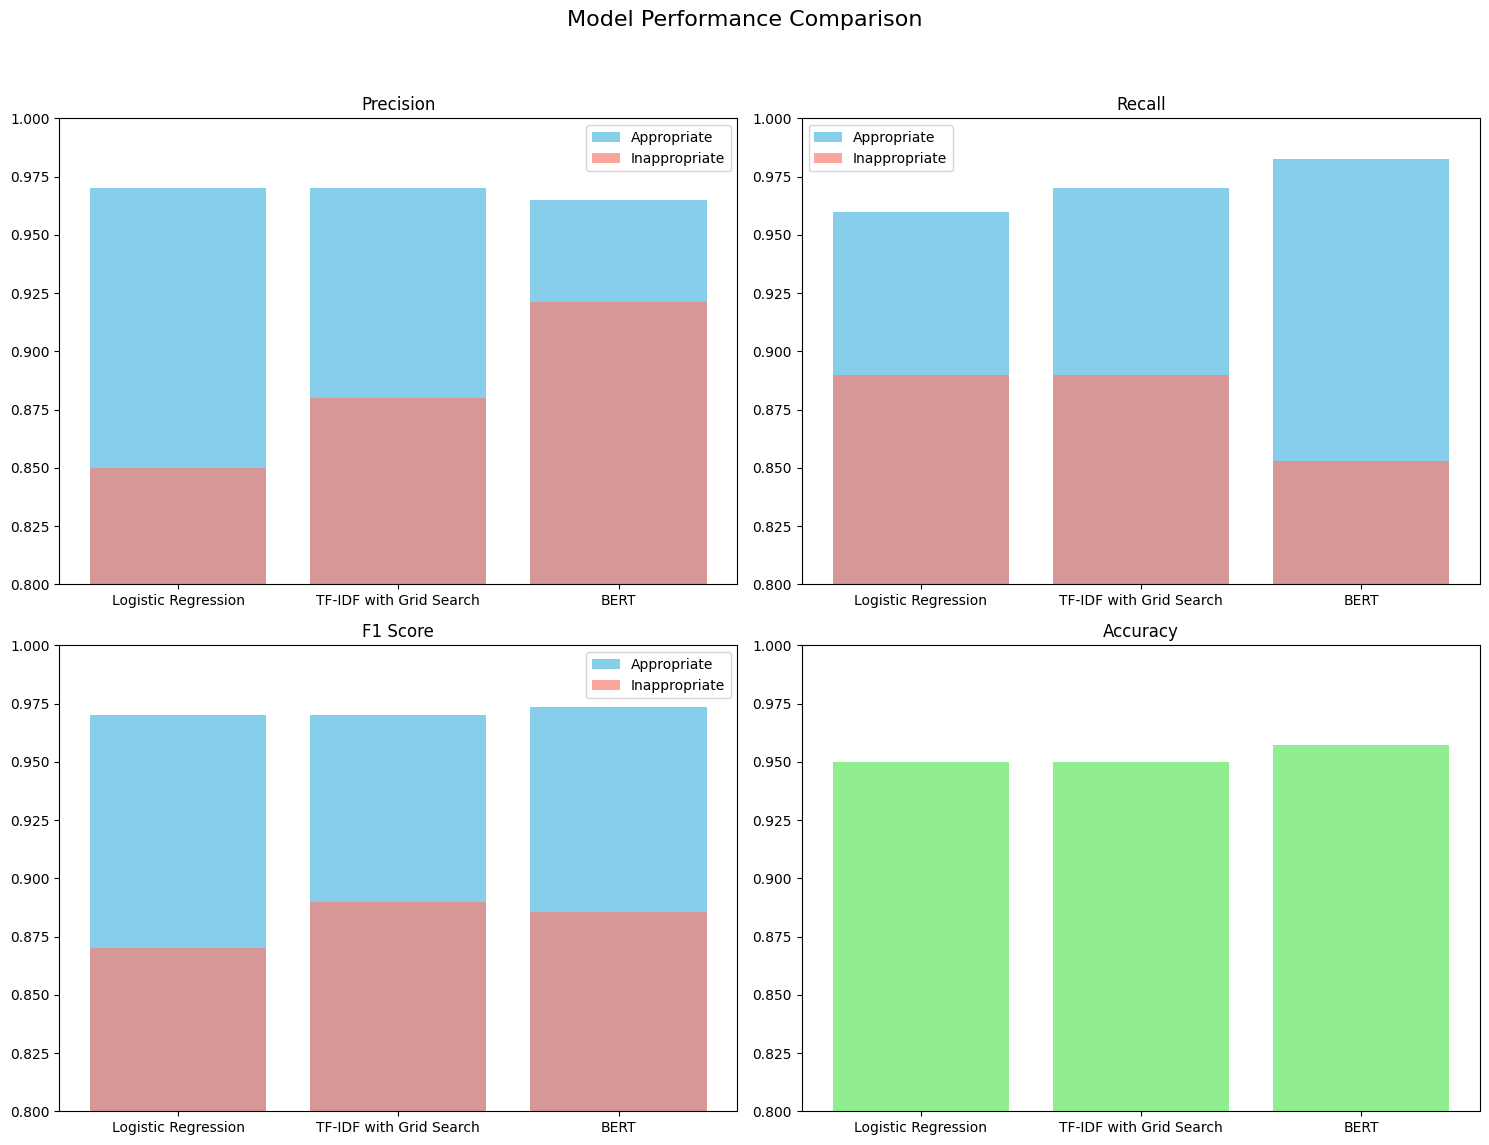

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Model Names
models = ['Logistic Regression', 'TF-IDF with Grid Search', 'BERT']

# Performance metrics for 'appropriate' and 'inappropriate' classes
precision_appropriate = [0.97, 0.97, 0.9651]
recall_appropriate = [0.96, 0.97, 0.9824]
f1_appropriate = [0.97, 0.97, 0.9737]

precision_inappropriate = [0.85, 0.88, 0.9212]
recall_inappropriate = [0.89, 0.89, 0.8530]
f1_inappropriate = [0.87, 0.89, 0.8857]

# Overall accuracy
accuracy = [0.95, 0.95, 0.9572]

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Bar plot for Precision
axes[0, 0].bar(models, precision_appropriate, color='skyblue', label='Appropriate')
axes[0, 0].bar(models, precision_inappropriate, color='salmon', label='Inappropriate', alpha=0.7)
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylim(0.8, 1.0)
axes[0, 0].legend()

# Bar plot for Recall
axes[0, 1].bar(models, recall_appropriate, color='skyblue', label='Appropriate')
axes[0, 1].bar(models, recall_inappropriate, color='salmon', label='Inappropriate', alpha=0.7)
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylim(0.8, 1.0)
axes[0, 1].legend()

# Bar plot for F1-score
axes[1, 0].bar(models, f1_appropriate, color='skyblue', label='Appropriate')
axes[1, 0].bar(models, f1_inappropriate, color='salmon', label='Inappropriate', alpha=0.7)
axes[1, 0].set_title('F1 Score')
axes[1, 0].set_ylim(0.8, 1.0)
axes[1, 0].legend()

# Bar plot for Accuracy
axes[1, 1].bar(models, accuracy, color='lightgreen')
axes[1, 1].set_title('Accuracy')
axes[1, 1].set_ylim(0.8, 1.0)

# Show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


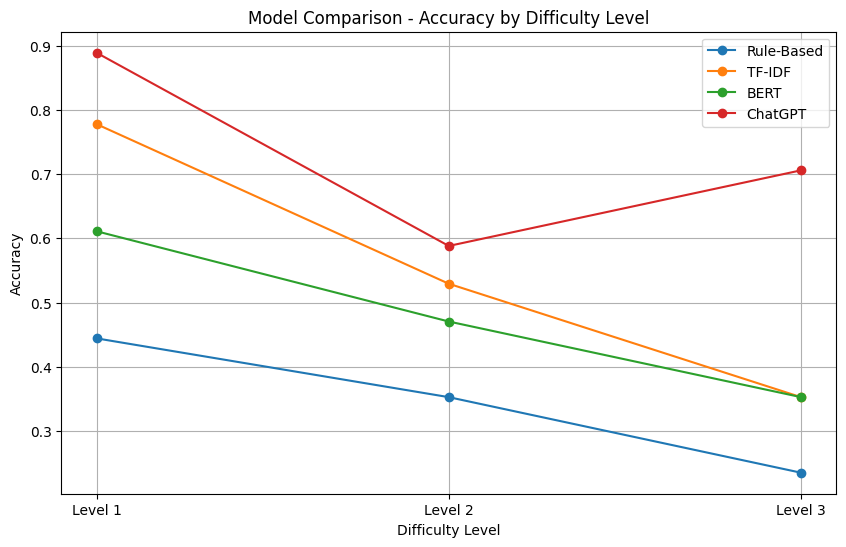

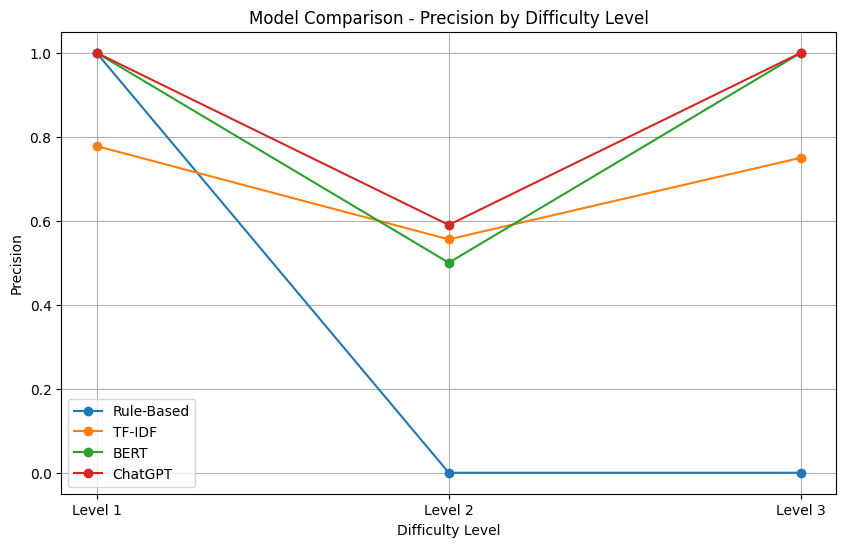

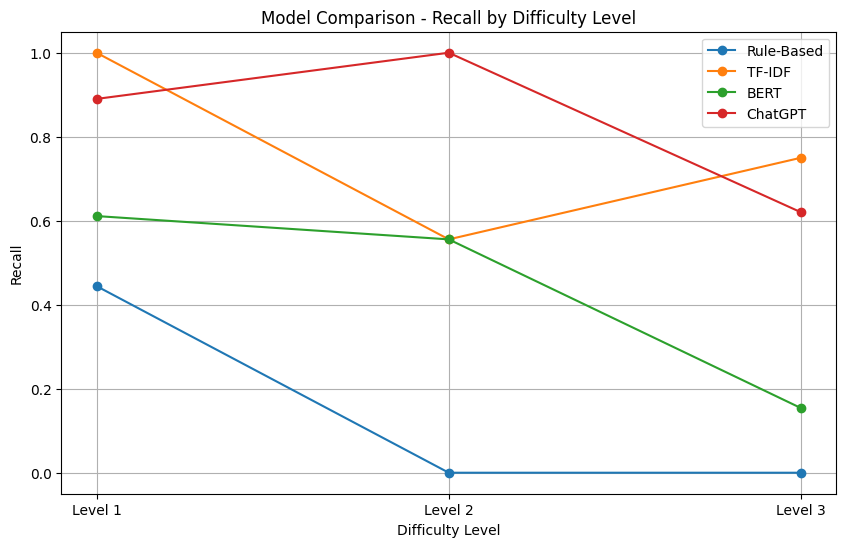

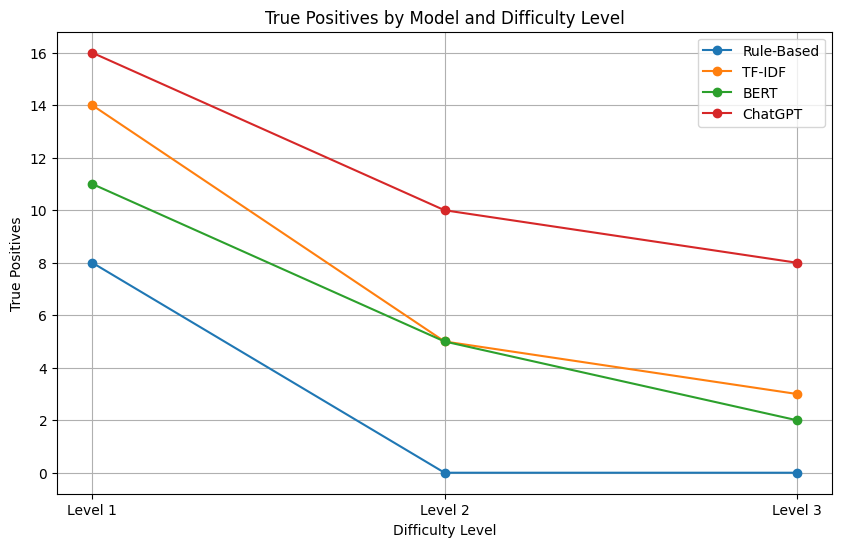

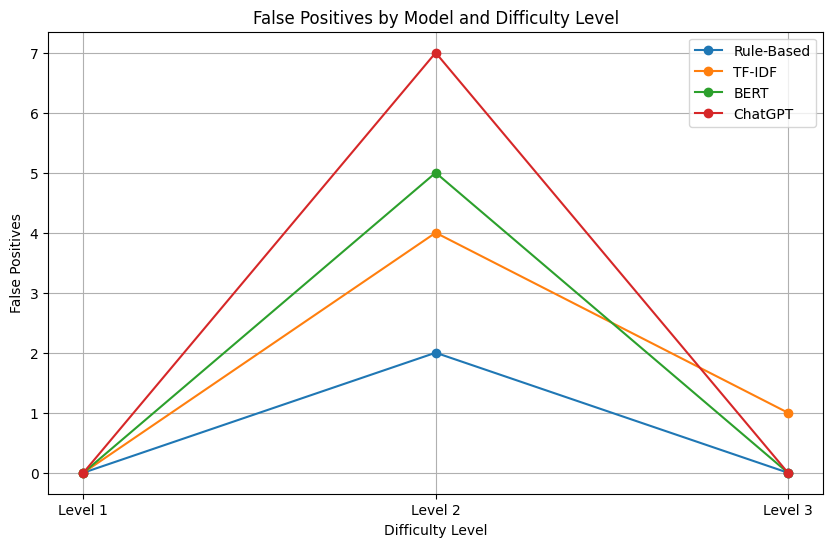

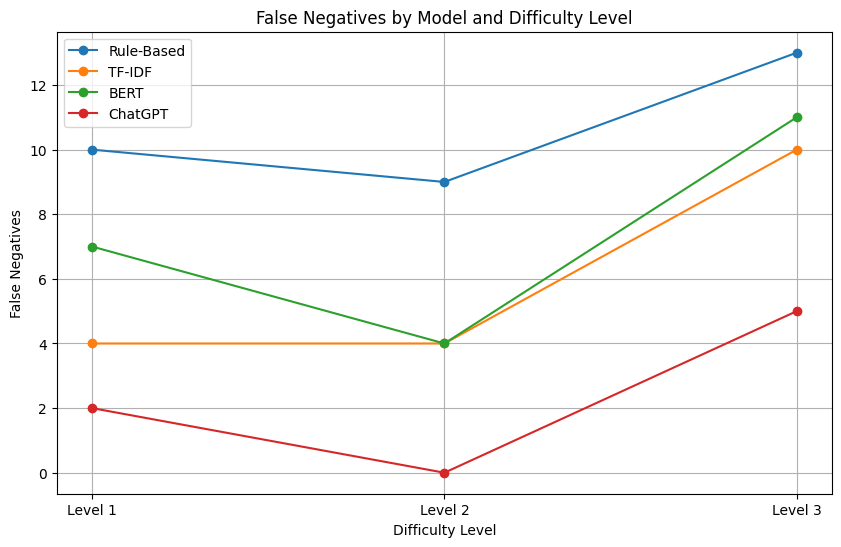

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Updated metrics data for all models including ChatGPT at each difficulty level
data = {
    'Model': [
        'Rule-Based', 'Rule-Based', 'Rule-Based', 
        'TF-IDF', 'TF-IDF', 'TF-IDF', 
        'BERT', 'BERT', 'BERT', 
        'ChatGPT', 'ChatGPT', 'ChatGPT'
    ],
    'Level': [
        'Level 1', 'Level 2', 'Level 3', 
        'Level 1', 'Level 2', 'Level 3', 
        'Level 1', 'Level 2', 'Level 3', 
        'Level 1', 'Level 2', 'Level 3'
    ],
    'Accuracy': [0.4444, 0.3529, 0.2353, 0.7778, 0.5294, 0.3529, 0.6111, 0.4706, 0.3529, 0.8889, 0.5882, 0.7059],
    'Precision': [1.0, 0.0, 0.0, 0.7778, 0.5556, 0.75, 1.0, 0.5, 1.0, 1.0, 0.59, 1.0],
    'Recall': [0.4444, 0.0, 0.0, 1.0, 0.5556, 0.75, 0.6111, 0.5556, 0.1538, 0.89, 1.0, 0.62],
    'True Positives': [8, 0, 0, 14, 5, 3, 11, 5, 2, 16, 10, 8],
    'True Negatives': [0, 6, 4, 0, 4, 3, 0, 3, 4, 0, 0, 4],
    'False Positives': [0, 2, 0, 0, 4, 1, 0, 5, 0, 0, 7, 0],
    'False Negatives': [10, 9, 13, 4, 4, 10, 7, 4, 11, 2, 0, 5]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting function for metrics comparison
def plot_metrics(metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    for model in df['Model'].unique():
        model_data = df[df['Model'] == model]
        plt.plot(model_data['Level'], model_data[metric], marker='o', label=model)
    
    plt.title(title)
    plt.xlabel("Difficulty Level")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot accuracy, precision, recall for each level and model
plot_metrics('Accuracy', 'Model Comparison - Accuracy by Difficulty Level', 'Accuracy')
plot_metrics('Precision', 'Model Comparison - Precision by Difficulty Level', 'Precision')
plot_metrics('Recall', 'Model Comparison - Recall by Difficulty Level', 'Recall')

# Additional confusion matrix components
def plot_confusion_component(component, title):
    plt.figure(figsize=(10, 6))
    for model in df['Model'].unique():
        model_data = df[df['Model'] == model]
        plt.plot(model_data['Level'], model_data[component], marker='o', label=model)
    
    plt.title(title)
    plt.xlabel("Difficulty Level")
    plt.ylabel(component)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot confusion matrix components for in-depth comparison
plot_confusion_component('True Positives', 'True Positives by Model and Difficulty Level')
plot_confusion_component('False Positives', 'False Positives by Model and Difficulty Level')
plot_confusion_component('False Negatives', 'False Negatives by Model and Difficulty Level')


{'Rule-Based Model': [1.0, 0.0, 0.0], 'TF-IDF with Grid Search': [1.0, 0.5555555555555556, 0.6], 'BERT Model': [1.0, 0.5555555555555556, 0.5], 'ChatGPT Model': [1.0, 0.7407407407407407, 0.8]}


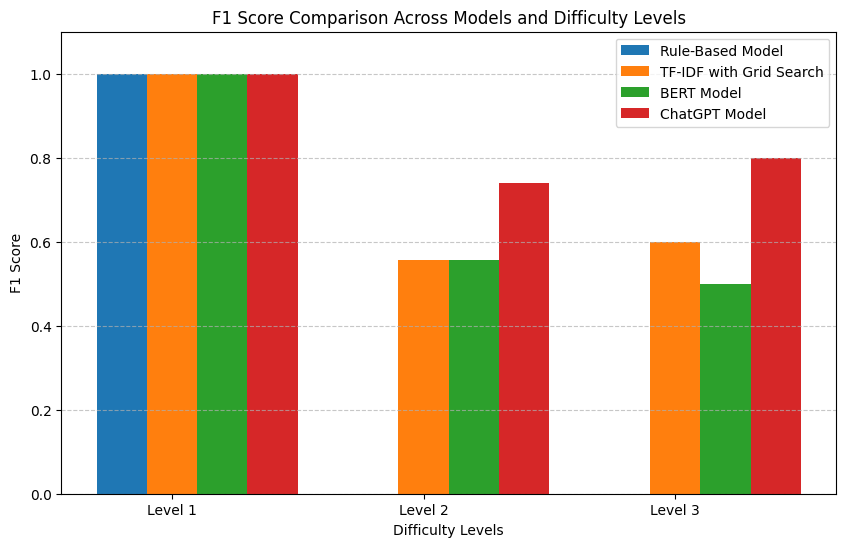

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Define model results for each difficulty level (as examples)
# Replace these with your actual values if available
results = {
    "Rule-Based Model": {
        "level_1": {"tp": 8, "fp": 0, "tn": 0, "fn": 10},
        "level_2": {"tp": 0, "fp": 2, "tn": 6, "fn": 9},
        "level_3": {"tp": 0, "fp": 0, "tn": 4, "fn": 13}
    },
    "TF-IDF with Grid Search": {
        "level_1": {"tp": 14, "fp": 0, "tn": 0, "fn": 4},
        "level_2": {"tp": 5, "fp": 4, "tn": 4, "fn": 4},
        "level_3": {"tp": 3, "fp": 1, "tn": 3, "fn": 10}
    },
    "BERT Model": {
        "level_1": {"tp": 11, "fp": 0, "tn": 0, "fn": 7},
        "level_2": {"tp": 5, "fp": 5, "tn": 3, "fn": 4},
        "level_3": {"tp": 2, "fp": 0, "tn": 4, "fn": 11}
    },
    "ChatGPT Model": {
        "level_1": {"tp": 16, "fp": 0, "tn": 0, "fn": 2},
        "level_2": {"tp": 10, "fp": 7, "tn": 0, "fn": 0},
        "level_3": {"tp": 8, "fp": 0, "tn": 4, "fn": 5}
    }
}

# Calculate F1 scores
f1_scores = {model: [] for model in results}

for model, levels in results.items():
    for level, metrics in levels.items():
        tp = metrics["tp"]
        fp = metrics["fp"]
        fn = metrics["fn"]
        
        # Calculate precision and recall
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        # Calculate F1 score
        f1 = f1_score([1]*tp + [0]*fp + [0]*fn + [1]*metrics.get("tn", 0), 
                      [1]*tp + [1]*fp + [0]*fn + [0]*metrics.get("tn", 0))
        
        f1_scores[model].append(f1)

# Plotting
difficulty_levels = ["Level 1", "Level 2", "Level 3"]
bar_width = 0.2
index = np.arange(len(difficulty_levels))

print(f1_scores)

plt.figure(figsize=(10, 6))
for i, (model, scores) in enumerate(f1_scores.items()):
    plt.bar(index + i * bar_width, scores, bar_width, label=model)

plt.xlabel("Difficulty Levels")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison Across Models and Difficulty Levels")
plt.xticks(index + bar_width, difficulty_levels)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


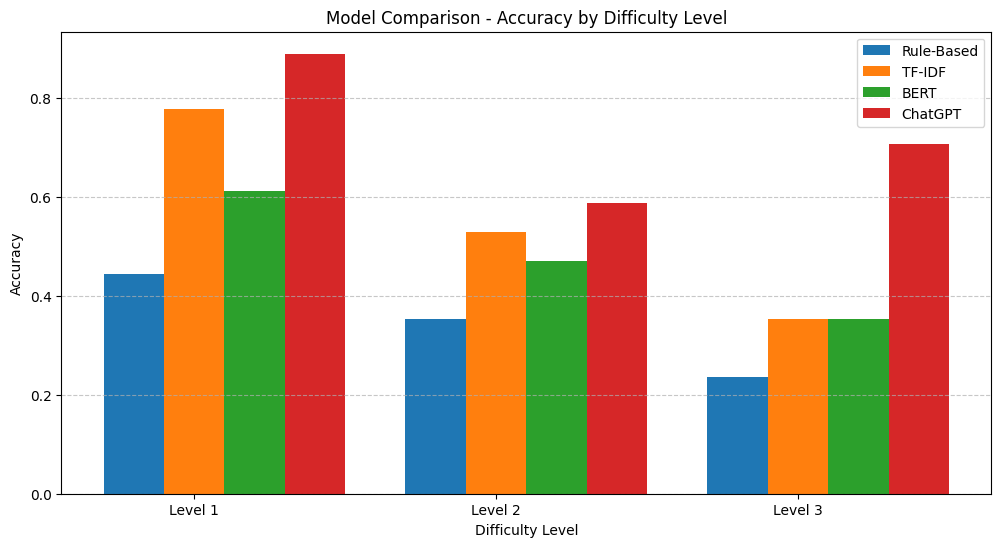

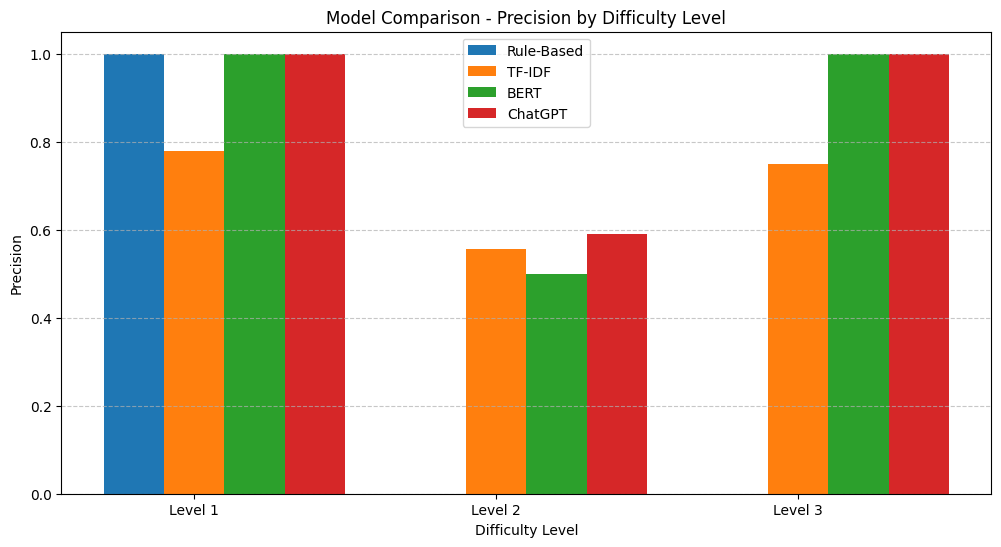

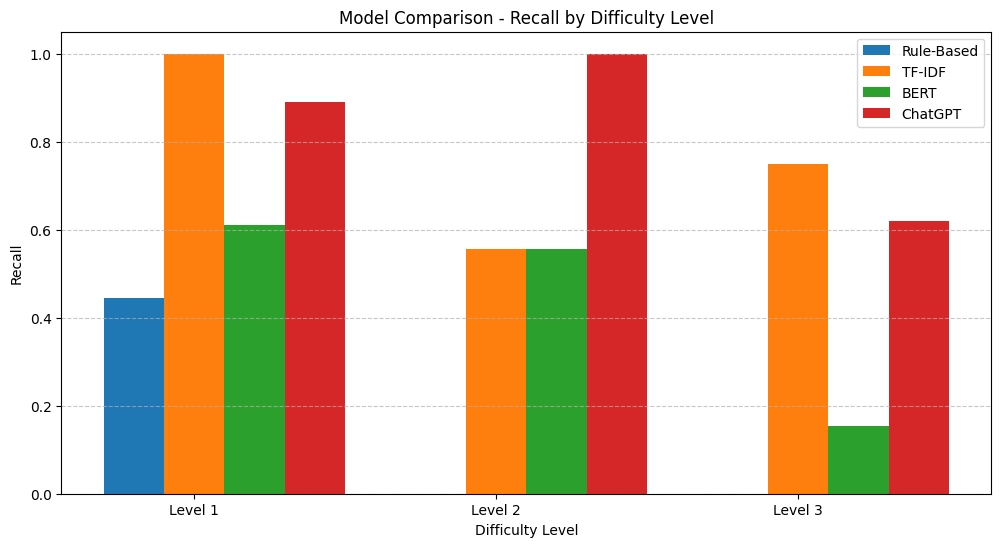

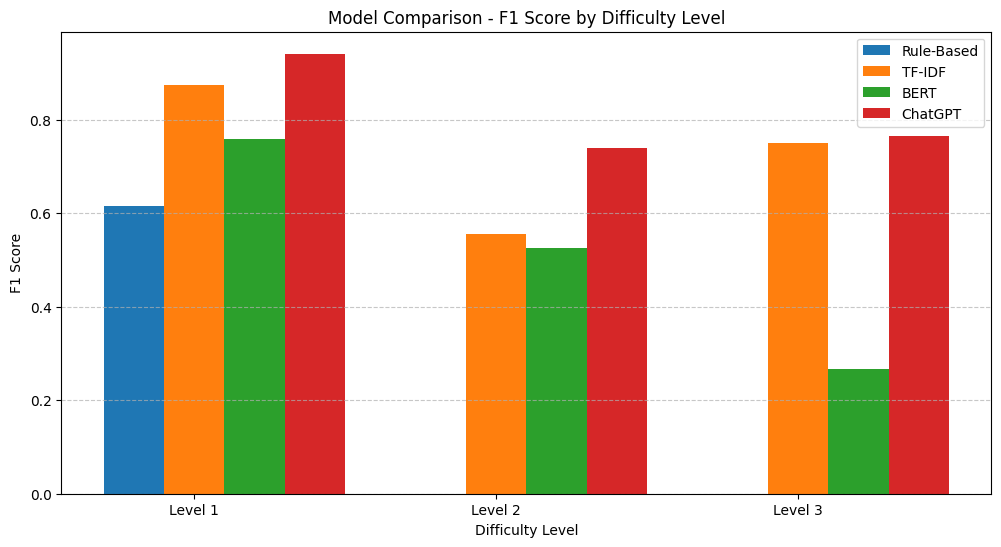

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Updated metrics data for all models including ChatGPT at each difficulty level
data = {
    'Model': [
        'Rule-Based', 'Rule-Based', 'Rule-Based', 
        'TF-IDF', 'TF-IDF', 'TF-IDF', 
        'BERT', 'BERT', 'BERT', 
        'ChatGPT', 'ChatGPT', 'ChatGPT'
    ],
    'Level': [
        'Level 1', 'Level 2', 'Level 3', 
        'Level 1', 'Level 2', 'Level 3', 
        'Level 1', 'Level 2', 'Level 3', 
        'Level 1', 'Level 2', 'Level 3'
    ],
    'Accuracy': [0.4444, 0.3529, 0.2353, 0.7778, 0.5294, 0.3529, 0.6111, 0.4706, 0.3529, 0.8889, 0.5882, 0.7059],
    'Precision': [1.0, 0.0, 0.0, 0.7778, 0.5556, 0.75, 1.0, 0.5, 1.0, 1.0, 0.59, 1.0],
    'Recall': [0.4444, 0.0, 0.0, 1.0, 0.5556, 0.75, 0.6111, 0.5556, 0.1538, 0.89, 1.0, 0.62],
    'F1 Score': [0.615,0,0,0.875,0.556,0.75,0.7586,0.526,0.2665,0.9417,0.74,0.7654]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to plot bar graphs for metrics comparison
def plot_bar_metrics(metric, title, ylabel):
    plt.figure(figsize=(12, 6))
    levels = df['Level'].unique()
    models = df['Model'].unique()
    bar_width = 0.2
    index = range(len(levels))

    for i, model in enumerate(models):
        model_data = df[df['Model'] == model]
        plt.bar([p + i * bar_width for p in index], model_data[metric], bar_width, label=model)

    plt.title(title)
    plt.xlabel("Difficulty Level")
    plt.ylabel(ylabel)
    plt.xticks([p + bar_width for p in index], levels)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot accuracy, precision, recall, and F1 score as bar graphs
plot_bar_metrics('Accuracy', 'Model Comparison - Accuracy by Difficulty Level', 'Accuracy')
plot_bar_metrics('Precision', 'Model Comparison - Precision by Difficulty Level', 'Precision')
plot_bar_metrics('Recall', 'Model Comparison - Recall by Difficulty Level', 'Recall')
plot_bar_metrics('F1 Score', 'Model Comparison - F1 Score by Difficulty Level', 'F1 Score')


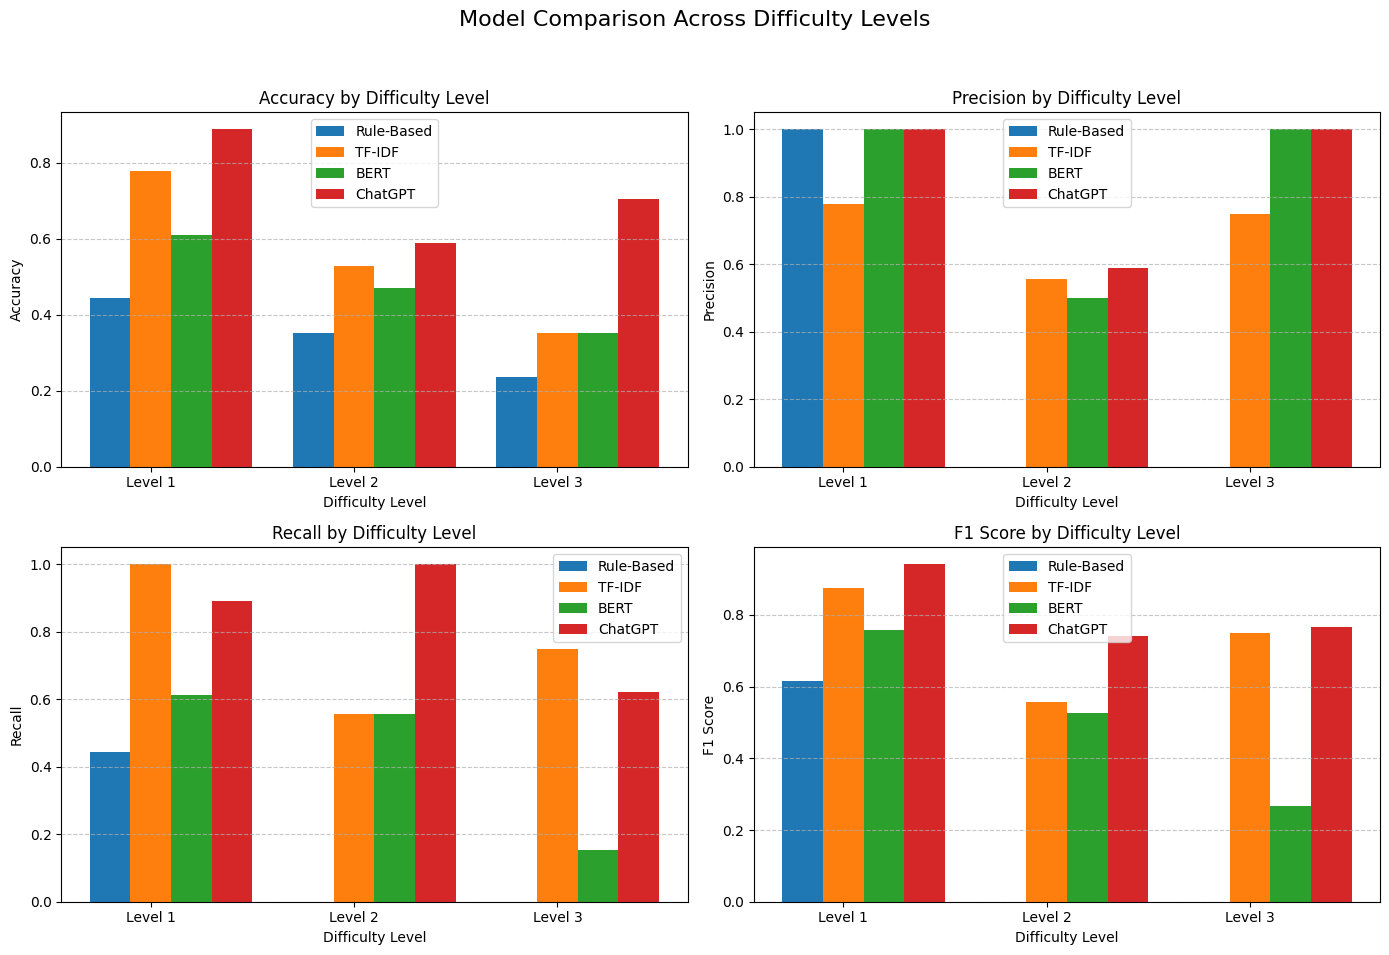

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Updated metrics data for all models including ChatGPT at each difficulty level
data = {
    'Model': [
        'Rule-Based', 'Rule-Based', 'Rule-Based', 
        'TF-IDF', 'TF-IDF', 'TF-IDF', 
        'BERT', 'BERT', 'BERT', 
        'ChatGPT', 'ChatGPT', 'ChatGPT'
    ],
    'Level': [
        'Level 1', 'Level 2', 'Level 3', 
        'Level 1', 'Level 2', 'Level 3', 
        'Level 1', 'Level 2', 'Level 3', 
        'Level 1', 'Level 2', 'Level 3'
    ],
    'Accuracy': [0.4444, 0.3529, 0.2353, 0.7778, 0.5294, 0.3529, 0.6111, 0.4706, 0.3529, 0.8889, 0.5882, 0.7059],
    'Precision': [1.0, 0.0, 0.0, 0.7778, 0.5556, 0.75, 1.0, 0.5, 1.0, 1.0, 0.59, 1.0],
    'Recall': [0.4444, 0.0, 0.0, 1.0, 0.5556, 0.75, 0.6111, 0.5556, 0.1538, 0.89, 1.0, 0.62],
      'F1 Score': [0.615,0,0,0.875,0.556,0.75,0.7586,0.526,0.2665,0.9417,0.74,0.7654]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define metrics and settings for subplots
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
titles = ['Accuracy by Difficulty Level', 'Precision by Difficulty Level', 'Recall by Difficulty Level', 'F1 Score by Difficulty Level']
y_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Comparison Across Difficulty Levels', fontsize=16)

# Plot each metric in a separate quadrant
for idx, metric in enumerate(metrics):
    row, col = divmod(idx, 2)
    ax = axs[row, col]
    
    levels = df['Level'].unique()
    models = df['Model'].unique()
    bar_width = 0.2
    index = np.arange(len(levels))
    
    for i, model in enumerate(models):
        model_data = df[df['Model'] == model]
        ax.bar(index + i * bar_width, model_data[metric], bar_width, label=model)
    
    ax.set_title(titles[idx])
    ax.set_xlabel("Difficulty Level")
    ax.set_ylabel(y_labels[idx])
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(levels)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
